# AB2017 - Python ile Pratik Makine Öğrenimi

Bu dökümanda sınıflandırma tipi makine öğrenimi örneği yapacağız. Öncelikle gerekli modülleri import ediyoruz:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

Bu örnekte el yazısı rakam veri setini kullanacağız. Amacımız 8x8'lik siyah beyaz resimlerden oluşan girdileri (input), 0'dan 9'a kadar rakamlarla eşleştirmek. Bunun için test veri seti genelin %50'si olacak şekilde ayarlıyoruz.

In [2]:
from sklearn.model_selection import train_test_split

number_dataset = datasets.load_digits()

X = number_dataset.data
y = number_dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

Model olarak destek vektör makinesi (Support Vector Machine - SVM) türünde bir sınıflandırıcı olan SVC'yi kullandık. Bunun için **gamma** parametresi olarak **0.001** verdik ve zorlanmadan yaklaşık %98'lik bir hassasiyete ulaştık.

In [3]:
from sklearn.svm import SVC

model = SVC(gamma=0.001, probability=True)
model.fit(X_train, y_train)

print model.score(X_test, y_test)

0.982202447164


Şimdi örnek olsun diye, test veri setinden 101. resmi alıyoruz. Model üstünden tahmin ettiğimizde de, ekrana bastığımızda da doğru sonuç çıkıyor.

9


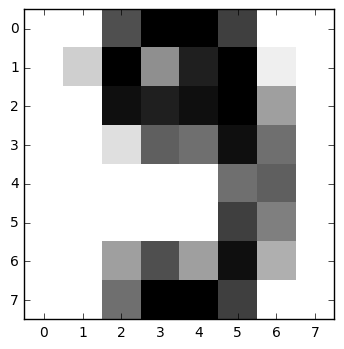

In [4]:
sample = X_test[100, :]

print model.predict(sample.reshape(1, -1))[0]

plt.imshow(sample.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')

Bunun yanı sıra model üstündeki skorların hepsini hızlıca çıkartabiliriz:

In [5]:
from sklearn.metrics import classification_report

print classification_report(model.predict(X_test), y_test)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        87
          1       1.00      0.97      0.98        92
          2       1.00      0.99      1.00       105
          3       0.98      0.99      0.98        85
          4       0.97      0.99      0.98        87
          5       0.98      0.96      0.97        97
          6       0.99      1.00      0.99        94
          7       1.00      0.97      0.98        93
          8       0.94      0.97      0.95        76
          9       0.96      0.99      0.98        83

avg / total       0.98      0.98      0.98       899



Şimdi ise farklı bir duruma gözatalım. Ya bu modele verdiğimiz girdi (input), hiçbir sınıfa ait değilse ne olacak? Örneğin girdi olarak bir harf verirsek, ne olmasını beklemeliyiz? Veya tamamen beyaz bir alan?

Bu noktada modelimiz başta ne için tasarlandıysa onu gerçekleştirecek. Yani kendisine verilen 1x64 boyutundaki bir matrisi, 10 sınıftan birisine (0'dan 9'a sayılara) eşitleyecek. Kısaca yanlış bir sonuç verecek.

Bu durumu kontrol altına alabilmek için yukarıda **SVC** sınıflandırıcısının içine **probability=True** şeklinde bir anahtar kelime argümanı verdik. Bu sayede modelimiz, kendisine verilen girdi için her sınıfa ait olasılık değerlerini hesaplayacak. Bu olasılık değerlerine **confidence** denir. Şimdi bununla ilgili bir örnek yapalım. Öncelikle düzgün bir girdi kullanalım:

In [6]:
sample = X_test[100, :].reshape(1, -1) # Tekrardan 101. örneği seçiyoruz

print(u"Tahmin edilen sınıf: %d" % model.predict(sample)[0])
print(u"Olasılık değerleri:")
print(model.predict_proba(sample)[0])

Tahmin edilen sınıf: 9
Olasılık değerleri:
[ 0.00167425  0.00189548  0.00434559  0.00517316  0.00176685  0.00521049
  0.00149446  0.00192142  0.0015688   0.9749495 ]


Görüldüğü üzere (0'dan başlayarak) 9. sıradaki olasılık değeri hepsinden büyük. Buna bakarak, girdinin 9. sınıfa ait olması gerektiğini söyleyebiliriz. Şimdi ise tamamen beyazdan oluşan bir görüntü matrisi oluşturalım ve kullanalım.

Tahmin edilen sınıf: 1
Olasılık değerleri:
[ 0.03628292  0.18337427  0.10397415  0.09513264  0.09420599  0.13240361
  0.03351041  0.1166951   0.09430536  0.11011554]


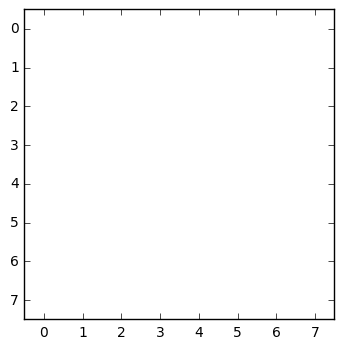

In [7]:
sample = np.zeros((1, 64), dtype=np.int16)

print(u"Tahmin edilen sınıf: %d" % model.predict(sample)[0])
print(u"Olasılık değerleri:")
print(model.predict_proba(sample)[0])

plt.imshow(sample.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')

Görüldüğü üzere hiçbir rakama denk olmayan bir girdi verdik ve bize bunun 1 rakamı olduğunu söyledi. Ama **confidence** değerlerine baktığımızda 1. sıradaki olasılık değerinin %16 civarında olduğunu görüyoruz. Yani bu sistem, sonucun 1. sınıfa ait olduğuna %16 ihtimalle emin.

Sadece buna bakarak, yapılan tahminin başarılı veya başarısız olduğunu söylememiz mümkündür. Çözmek istediğiniz probleme göre olacak şekilde, **confidence** değeri için bir eşik değeri seçip tahminin kendisinin başarılı olup olmadığına karar verebilirsiniz. Örneğin: "*Eğer tahminin confidence değeri %80'in altındaysa, tahmini başarısız olarak kabul et.*" gibi.

Sınıflandırıcı modelin confidence değerini üretmesi için belirli parametreler vermeniz gerekebilir. Bazı modellerde ise confidence değerleri otomatik olarak üretilir (Karar Ağaçları veya Softmax aktivasyonuna sahip sinir ağları gibi).